# Создание представлений узлов с помощью DeepWalk

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import math

In [2]:
# создаем векторы слов king, woman и queen
vec_king = np.array([-2.1, 4.1, 0.6])
vec_woman = np.array([2.8, -2.6, -1.1])
vec_queen = np.array([-1.9, 2.6, 1.5])

In [3]:
# пишем функцию, вычисляющую евкидово расстояние
# между двумя векторами слов
def euclidean_distance(x1, x2):
    """ 
    Вычисляет евклидово расстояние 
    между векторами слова. 
    """
    distance = 0
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

In [4]:
# вычисляем евкидово расстояние
# между векторами слов king и queen
print(euclidean_distance(vec_king, vec_queen))
# вычисляем евкидово расстояние
# между векторами слов king и woman
print(euclidean_distance(vec_king, vec_woman))

1.7606816861659005
8.472897969408105


In [5]:
np.random.seed(0)

CONTEXT_SIZE = 2

text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem 
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut 
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis 
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor 
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices 
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis 
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id 
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim 
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget 
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis, 
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi 
tristique senectus et netus et malesuada fames ac turpis egestas. Donec 
tristique ultrices tortor at accumsan.
""".split()

# создаем скип-граммы
skipgrams = []
for i in range(CONTEXT_SIZE, len(text) - CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i - CONTEXT_SIZE, 
                                        i + CONTEXT_SIZE + 1) if j != i]
    skipgrams.append((text[i], array))

print(skipgrams[0:2])

[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']), ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]


In [6]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Длина словаря = {VOCAB_SIZE}")

Длина словаря = 121


In [7]:
from gensim.models.word2vec import Word2Vec

# создаем Word2Vec
model = Word2Vec([text],
                 # 0 - CBOW, 1 - skip-gram
                 sg=1,
                 vector_size=10,
                 min_count=0,
                 window=2,
                 workers=1,
                 seed=0)

print(f'Форма матрицы W_embed: {model.wv.vectors.shape}')

Форма матрицы W_embed: (121, 10)


In [8]:
# обучаем модель
model.train([text], 
            total_examples=model.corpus_count, 
            epochs=10)

# печатаем эмбеддинг слова
print('\nЭмбеддинг слова =')
print(model.wv[0])


Эмбеддинг слова =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.0955243  -0.06482638  0.0660186 ]


/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


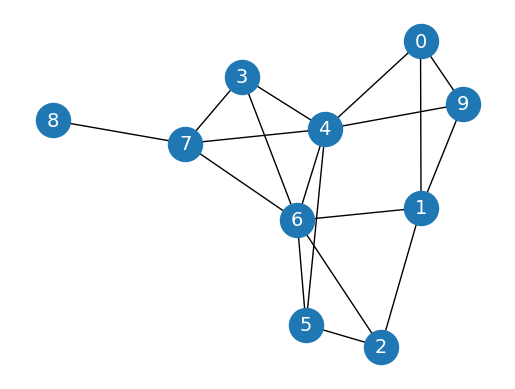

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# создаем граф
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

# визуализируем граф
plt.figure()
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [10]:
np.random.seed(0)

def random_walk(start, length):
    walk = [str(start)]  # стартовый узел
    
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node
    
    return walk

# получаем результат случайных блужданий
print(random_walk(0, 10))

['0', '1', '9', '1', '0', '4', '6', '7', '6', '5', '6']


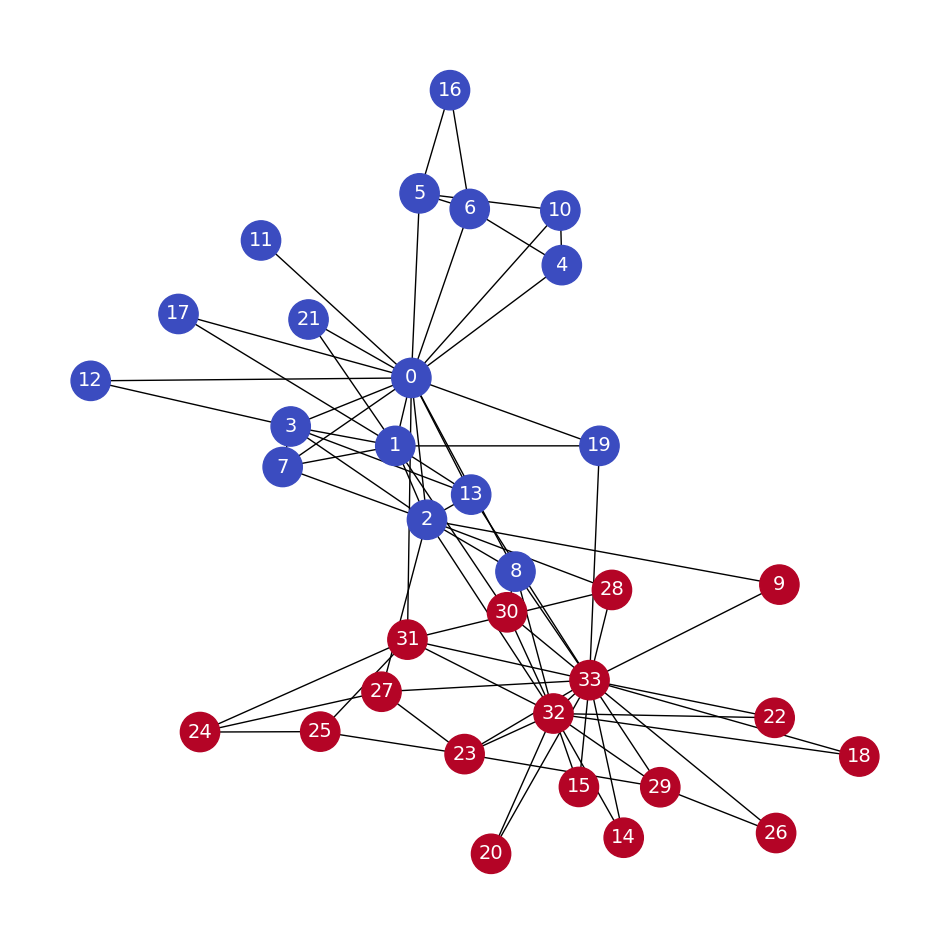

In [11]:
# загрузим набор данных
G = nx.karate_club_graph()

# получаем метки (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

# визуализируем граф
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [12]:
# создаем список, в котором будут записаны 
# результаты случайных блужданий
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

# напечатаем первое случайное блуждание
print(walks[0])

['0', '10', '0', '17', '0', '2', '13', '0', '2', '9', '33']


In [13]:
# создаем Word2Vec
model = Word2Vec(walks,
                 hs=1, # иерархический softmax
                 sg=1, # модель skip-gram
                 vector_size=100,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Форма матрицы эмбеддингов: {model.wv.vectors.shape}')

Форма матрицы эмбеддингов: (34, 100)


In [14]:
# создаем словарь
model.build_vocab(walks)

# обучаем модель
model.train(walks, 
            total_examples=model.corpus_count,
            epochs=30, 
            report_delay=1);

In [15]:
# самые схожие узлы
print('Узлы, которые больше всего похожи на узел 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'{similarity}')

Узлы, которые больше всего похожи на узел 0:
('7', 0.6418899893760681)
('11', 0.6362671256065369)
('10', 0.6353005766868591)
('4', 0.6283879280090332)
('1', 0.6240326762199402)
('17', 0.6081677675247192)
('6', 0.5763440132141113)
('5', 0.5598748326301575)
('21', 0.5572237372398376)
('16', 0.550387442111969)


In [16]:
# сходство между двумя узлами
print(f"\nСходство между узлами 0 и 4: {model.wv.similarity('0', '4')}")


Сходство между узлами 0 и 4: 0.6283879280090332


/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


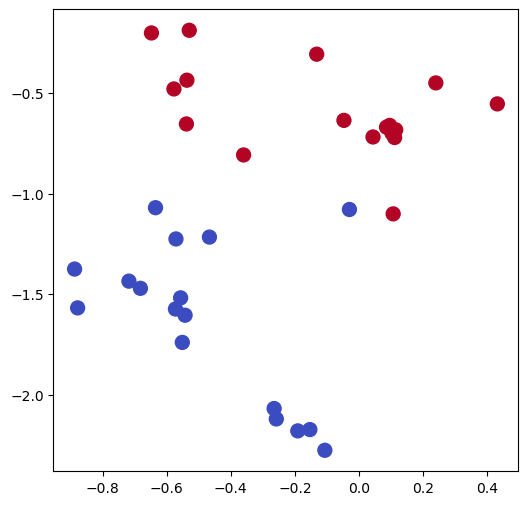

In [17]:
from sklearn.manifold import TSNE

# подготовим векторы слов и метки
nodes_wv = np.array([model.wv.get_vector(str(i)) 
                     for i in range(len(model.wv))])
labels = np.array(labels)

# обучаем TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

# визуализируем TSNE
plt.figure(figsize=(6, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# создаем маски для обучения и теста
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 
             23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# обучаем классификатор
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

# оцениваем качество
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f'Правильность = {acc*100:.2f}%')

Правильность = 90.91%
